# Time Series Prediction


In [1]:
# @ Lukman copyright 
# MIT Licence

In [1]:
# for data frame analysis
import pandas as pd 

# for mathematical operations
import numpy as np 

# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline


# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For Normalizing data
from sklearn.preprocessing import StandardScaler

# For statistical test
import scipy.stats as stats

# Split data set into training and test set
from sklearn.model_selection import train_test_split as tts

# SVN module
from sklearn import svm

# Kernel Functions used 
from sklearn.metrics.pairwise import rbf_kernel,laplacian_kernel

# module for chi square test
from scipy.stats import chisquare


# For dictionary 
from collections import defaultdict



# Data Preprocessing 

In [2]:
# I will Load only the zero meter data set 
# same syntax applied for other data set
meterOneDataLOaded= pd.read_csv('meterOneTrainData.csv')
# all meter types data set could be analysed in same manner

In [3]:
meterOneDataLOaded[1:3]

,Unnamed: 0,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1,1,162,1,2016-01-01 00:00:00,0.0000,2,Education,98829,1968.0,NaN,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6
2,2,163,1,2016-01-01 00:00:00,4.5719,2,Education,72102,1970.0,NaN,15.6,6.0,-5.6,NaN,1015.3,270.0,3.6


In [4]:
# delete column unnmaed
del meterOneDataLOaded['Unnamed: 0']

In [5]:
# column values 
meterOneDataLOaded.columns.tolist()

['building_id',
 'meter',
 'timestamp',
 'meter_reading',
 'site_id',
 'primary_use',
 'square_feet',
 'year_built',
 'floor_count',
 'air_temperature',
 'cloud_coverage',
 'dew_temperature',
 'precip_depth_1_hr',
 'sea_level_pressure',
 'wind_direction',
 'wind_speed']

In [6]:
# store column as list
columns = meterOneDataLOaded.columns.tolist()

In [7]:
# get null values per column in the data set
meterOneDataLOaded.isnull().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built            2819559
floor_count           3972549
air_temperature         23502
cloud_coverage        1742296
dew_temperature         24341
precip_depth_1_hr      541565
sea_level_pressure     105047
wind_direction         402544
wind_speed              37330
dtype: int64

In [8]:
# chnage to time sta
meterOneDataLOaded['timestamp'] =  pd.to_datetime(meterOneDataLOaded['timestamp'])


In [9]:
# check the unique time stamp present
pd.DatetimeIndex(meterOneDataLOaded['timestamp']).year.unique()

Int64Index([2016], dtype='int64', name='timestamp')

In [10]:
meterOneDataLOaded.dtypes

building_id                    int64
meter                          int64
timestamp             datetime64[ns]
meter_reading                float64
site_id                        int64
primary_use                   object
square_feet                    int64
year_built                   float64
floor_count                  float64
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
dtype: object

In [11]:
# set time stamp as index 
meterOneDataLOaded.set_index('timestamp',inplace=True);


In [12]:
# Usually one would also need to read about the data collection process . This is so as to understand what each
# column and headers stands for. And in particular what assumptions have been made by the collectors
# of the data.

Text(0,0.5,'Meter Reading')

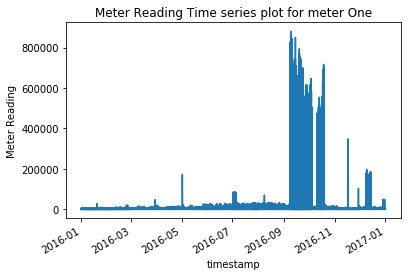

In [13]:
meterOneDataLOaded['meter_reading'].plot(subplots=True)
plt.title('Meter Reading Time series plot for meter One')
plt.ylabel('Meter Reading')

Text(0,0.5,'Air temperature')

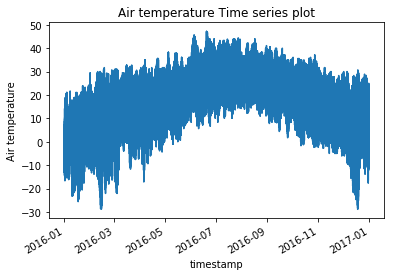

In [15]:
# drop the storeid
meterOneDataLOaded['air_temperature'].plot(subplots=True)
plt.title('Air temperature Time series plot')
plt.ylabel('Air temperature')

#### Interactive Visualizer


In [12]:
# a subset of the data has been copied to use to test the visualizer function
# use the full data set if space is available and system is fast
train_test = meterOneDataLOaded[['meter_reading', 'square_feet', 'air_temperature','primary_use', 'site_id']][1:30000].copy()



In [13]:
# reset the index so that time is no longer the index
# the index is now  numbers 
train_test.reset_index(level=0, inplace=True)


In [14]:
# confirm that timestamp is no longer the index 
# and that 
train_test.columns

Index(['timestamp', 'meter_reading', 'square_feet', 'air_temperature',
       'primary_use', 'site_id'],
      dtype='object')

In [15]:
# only 2016 data is represented here as usual
pd.DatetimeIndex(train_test['timestamp']).year.unique()

Int64Index([2016], dtype='int64', name='timestamp')

In [16]:
# extrac year month and day
train_test['year'] = pd.DatetimeIndex(train_test['timestamp']).year
train_test['month'] = pd.DatetimeIndex(train_test['timestamp']).month
train_test['day'] = pd.DatetimeIndex(train_test['timestamp']).day

In [17]:
# check null values
train_test.isnull().sum()

timestamp             0
meter_reading         0
square_feet           0
air_temperature    1836
primary_use           0
site_id               0
year                  0
month                 0
day                   0
dtype: int64

In [18]:
# check data types
train_test.dtypes

timestamp          datetime64[ns]
meter_reading             float64
square_feet                 int64
air_temperature           float64
primary_use                object
site_id                     int64
year                        int64
month                       int64
day                         int64
dtype: object

In [21]:
# replace null with zero
# the zero is just base on simple assumption 
# since it is only a plot (moreover we might want zero for where no value s available)
# for model building we have to look for a better heuristic
train_test['air_temperature'].fillna(0, inplace=True)

In [22]:
#del train_test['timestamp']

In [25]:
# view data set
train_test.head()

,timestamp,meter_reading,square_feet,air_temperature,primary_use,site_id,year,month,day
0,2016-01-01,0.0000,98829,15.6,Education,2,2016,1,1
1,2016-01-01,4.5719,72102,15.6,Education,2,2016,1,1
2,2016-01-01,209.8860,553210,15.6,Lodging/residential,2,2016,1,1
3,2016-01-01,0.0000,86323,15.6,Lodging/residential,2,2016,1,1
4,2016-01-01,51.5570,183460,15.6,Education,2,2016,1,1


In [32]:
#train_test.loc[train_test['meter_reading']]
# Visualizer specification here
# the slider and date checkbox are first defined here
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=29.0,
    step=1.0,
    description='Day:',
    continuous_update=True
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=False,
)
# but the date and month slider in a separate container
container = widgets.HBox(children=[use_date, month])


# define drop down menu to select primary use. site id and year
# note only 2016 is present in the data set


textbox = widgets.Dropdown(
    description='Primary Use:   ',
    value='Education',
    options=train_test['primary_use'].unique().tolist()
)

time = widgets.Dropdown(
    options=list(train_test['year'].unique()),
    value=2016,
    description='Year: ',
)

origin = widgets.Dropdown(
    options=list(train_test['site_id'].unique()),
    value=2,
    description='Site ID:',
)





# Assign an empty figure widget with two traces
trace1 =  go.Scatter(x=train_test['timestamp'], y=train_test['meter_reading'], opacity=0.75, name='MeterReadings',mode = 'lines+markers')
# uncomment this if systen has enough space
trace2 =  go.Scatter(x=train_test['timestamp'], y=train_test['air_temperature'], opacity=0.75, name='Air Temperature', mode = 'lines+markers')

#change data to this if space available 
# add more trace too if system has enough space and computational power
#data = [trace1, trace2]
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Energy Consumption Plot'
                        )
                        
                    ))

In [33]:
# function to control display of data abd set default value to be displayed
def validate():
    if origin.value in train_test['site_id'].unique() and textbox.value in train_test['primary_use'].unique() and time.value in train_test['year'].unique() :
        return True
    else:
        return False

# function to respond to change in options
def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k and l for i, j, k, l in
                           zip(train_test['day'] == month.value, train_test['primary_use'] == textbox.value,
                               train_test['site_id'] == origin.value, train_test['year'] == time.value )]
            temp_df = train_test[filter_list]

        else:
            filter_list = [i and j and k for i, j, k in
                           zip(train_test['primary_use'] == textbox.value ,train_test['site_id'] == origin.value,train_test['year'] == time.value)]
            temp_df = train_test[filter_list]
        x1 = temp_df['meter_reading']
        x2 = temp_df['air_temperature']
        with g.batch_update():
            g.data[0].y = x1
            g.data[1].y = x2
            #g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Year'
            g.layout.yaxis.title = 'Values'


origin.observe(response, names="value")
time.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [34]:
container2 = widgets.HBox([origin, textbox, time])
widgets.VBox([container,
              container2,
              g])

VBox(children=(HBox(children=(Checkbox(value=False, description='Date: '), IntSlider(value=1, description='Day:', max=29, min=1))), HBox(children=(Dropdown(description='Site ID:', options=(2, 6, 7, 9, 10, 11, 13, 14, 15), value=2), Dropdown(description='Primary Use:   ', options=('Education', 'Lodging/residential', 'Retail', 'Office', 'Entertainment/public assembly', 'Food sales and service', 'Public services', 'Healthcare', 'Utility', 'Other', 'Technology/science', 'Parking', 'Manufacturing/industrial', 'Religious worship'), value='Education'), Dropdown(description='Year: ', options=(2016,), value=2016))), FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'MeterReadings',
              'opacity': 0.75,
              'type': 'scatter',
              'uid': '37062647-d7d3-4e38-a8ae-8b8a54d0117a',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0), ...,
                          datetime.datetime(2016, 1, 3, 18, 0),
                          datetime.datetime(2016, 1, 3, 18, 0),
                          datetime.datetime(2016, 1, 3, 18, 0)], dtype=object),
              'y': array([  0.    ,   4.5719, 209.886 , ...,   0.    ,  91.2974,  95.8342])},
             {'mode': 'lines+markers',
              'name': 'Air Temperature',
              'opacity': 0.75,
              'type': 'scatter',
              'uid': 'fc482ddc-9b11-48b4-8d85-15db45b9ed1c',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 1, 0, 0), ...,
                          datetime.datetime(2016, 1, 3, 18, 0),
                          datetime.datetime(2016, 1, 3, 18, 0),
                          datetime.datetime(2016, 1, 3, 18, 0)], dtype=object),
              'y': array([15.6, 15.6, 15.6, ..., 17.8, 17.8, 17.8])}],
    'layout': {'title': {'text': 'Energy Consumption Plot'}}
})))

### Some Statistics
These have been included for completeness. In particular because
now we are evaluating for specific meter

Text(0.5,1,'Rolling window plots meter reading')

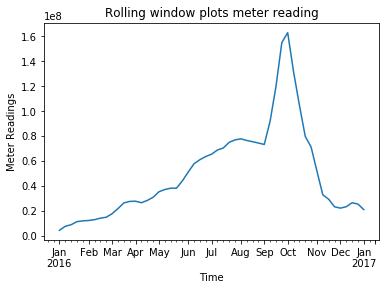

In [13]:

meterOneDataLOaded.meter_reading.resample("1W").sum().rolling(window=3, min_periods=1).mean().plot()
plt.xlabel('Time')
plt.ylabel('Meter Readings')
plt.title('Rolling window plots meter reading')

### Correlation Plot

In [ ]:
# correlation plot helps us understand if the signal is just noise or
# whether there is some correlation in the values received

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning:

'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.



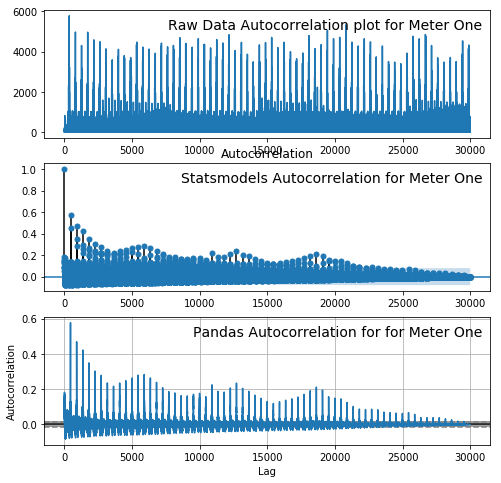

In [21]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=3, figsize=(8, 8))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(train_test.meter_reading)
label(axes[0],'Raw Data Autocorrelation plot for Meter One')



tsaplots.plot_acf(train_test.meter_reading, axes[1])
label(axes[1], 'Statsmodels Autocorrelation for Meter One')

pd.tools.plotting.autocorrelation_plot(train_test.meter_reading, ax=axes[2])
label(axes[2], 'Pandas Autocorrelation for for Meter One')


plt.show()

There are two ways to check the stationarity of a time series. The first is by looking at the data- which we can observe by viewing from the plots in the previous notebook. By plots of the data it should be easy to identify the changing mean or variation in the data.

A more accurate assessment is the Dickey-Fuller test. If the ‘Test Statistic’ is greater than the ‘Critical Value’ then the time series is stationary. 

In [14]:
#Test for Stationarity 
#Function to test for Stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    

/home/cat/anaconda3/envs/cat/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



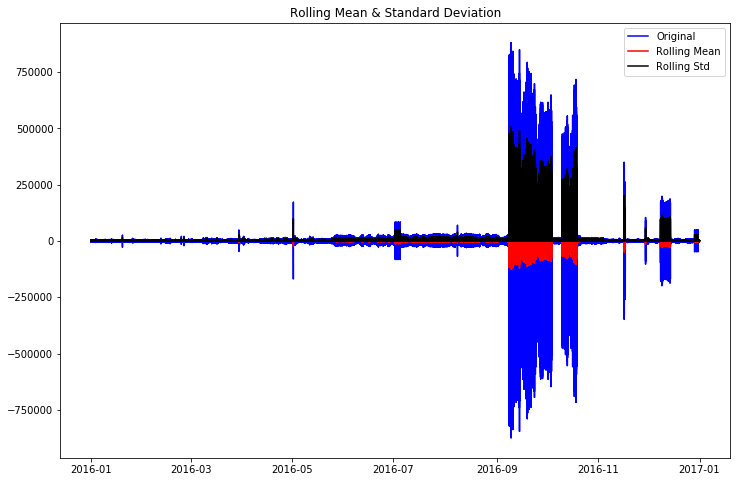

In [15]:
# rolling mean of the differenced data
test_stationarity(meterOneDataLOaded.meter_reading.diff().fillna(0))


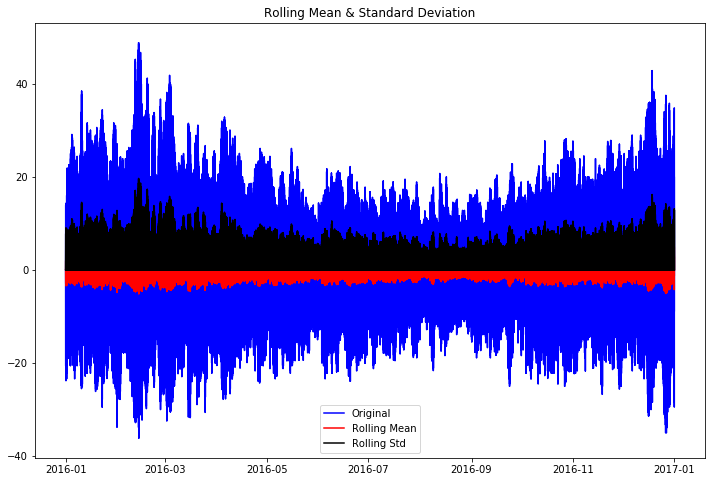

In [17]:
# rolling mean of differenced temdperature
test_stationarity(meterOneDataLOaded.air_temperature.diff().fillna(0))


# Conclusion
simple statistical analysis and important visualization completed here. Feel free to do same computation for other meters
